In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Salary_dataset.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [15]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [16]:
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [18]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [20]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [21]:
data.shape

(30, 2)

In [22]:
data.tail()

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


In [23]:
##Splitting data in features and target

X=data.iloc[:,:-1].values
y=data.iloc[:1].values
X,y

(array([[ 1.2],
        [ 1.4],
        [ 1.6],
        [ 2.1],
        [ 2.3],
        [ 3. ],
        [ 3.1],
        [ 3.3],
        [ 3.3],
        [ 3.8],
        [ 4. ],
        [ 4.1],
        [ 4.1],
        [ 4.2],
        [ 4.6],
        [ 5. ],
        [ 5.2],
        [ 5.4],
        [ 6. ],
        [ 6.1],
        [ 6.9],
        [ 7.2],
        [ 8. ],
        [ 8.3],
        [ 8.8],
        [ 9.1],
        [ 9.6],
        [ 9.7],
        [10.4],
        [10.6]]),
 array([[1.2000e+00, 3.9344e+04]]))

In [25]:
x=data.drop(['Salary'],axis=1)
y=data['Salary']
print(x)
print(y)

    YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6
0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25   

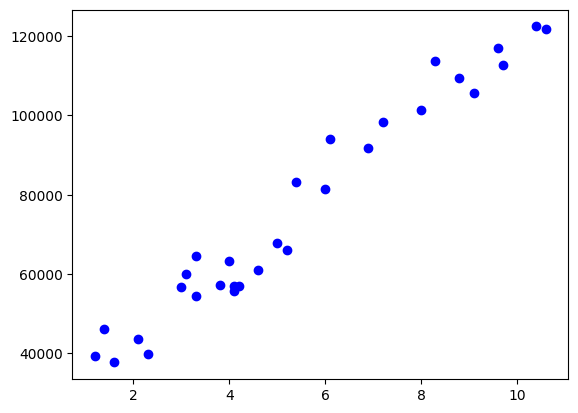

In [40]:
plt.scatter(X,y,color = "blue")

In [27]:

# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
##Train linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

<function matplotlib.pyplot.show(close=None, block=None)>

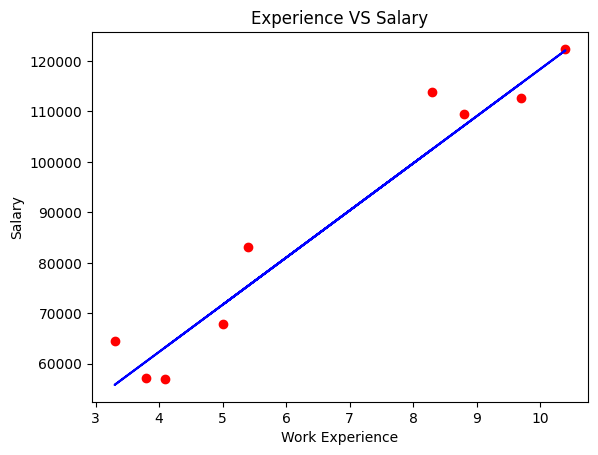

In [36]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Experience VS Salary")
plt.show

In [39]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean squared error = 37784662.47
Explain variance score = 0.95
R2 score = 0.94


In [41]:
print(model.coef_)
print(model.intercept_)

[9339.08172382]
24985.53016251169


In [43]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:", rmse)

RMSE: 6146.9230079945755
